In [1]:
import gym

In [2]:
# to install gym_act:
# git clone https://github.com/PhilippeW83440/CS234_Project.git
# cd gym-act
# pip install -e .
import gym_act

# source code is in https://github.com/PhilippeW83440/CS234_Project/blob/master/gym-act/gym_act/envs/act_env.py
# or if you did: git clone https://github.com/PhilippeW83440/CS234_Project.git
# in CS234_Project/gym-act/gym_act/envs/act_env.py
env = gym.make("Act-v0")

[2019-03-05 16:51:28,700] Making new env: Act-v0


SEED 17460018659593759927
[100   0   0  20  43 181  13   4  36  25  19   2  33  87  19   0  20  63
  16   0   6  47  17   4 151 110 -16  -4 169  91 -16  -3 175 161 -16   0
 171 164 -18  -1 170  49 -13  -2]


In [3]:
action = 0
obs, reward, done, info = env.step(action)
print("reward {}".format(reward))
img = env.render()

reward -76.68876729219286


In [4]:
import matplotlib.pyplot as plt
import cv2

def show_img(img):
    plt.imshow(img)
    plt.show()
    
def  resize_images(images, f=3):
    big_images = []
    for img in images:
        big_images.append(cv2.resize(img, None, fx=f, fy=f))
    return big_images

plt.rcParams["figure.figsize"]=10,10

In [5]:
import numpy as np

max_episodes = 5
max_steps = 120

# METRICS
metric_success = 0 # EFFICIENCY
metric_steps_to_goal = [] # SAFETY
metric_hardbrake = [] # COMFORT

for episode in range(max_episodes):
    print("====> Start episode {}".format(episode))
    env.reset()
    cumulated_reward = 0
    images = []
    
    hardbrake = 0    
    for n in range(max_steps):
        action = 0.0
        if action <= -2:
            hardbrake += 1
        state, reward, done, info = env.step(action)
        cumulated_reward += reward
        print("Step {}: action={} reward={} done={}".format(n, action, reward, done)) # PHW DEBUG
        img = env.render()
        images.append(img)
        if done is True:
            if info == "success":
                metric_success += 1
                metric_steps_to_goal.append(n)
                metric_hardbrake.append(hardbrake)
            print("End of episode {} with cumulated_reward {}".format(episode, cumulated_reward))
            break
            
print("METRICS: SAFETY %collisions = {}, COMFORT MeanHardBrake = {}, EFFICIENCY MeanStepsToGoal = {}".format(1-metric_success/max_episodes, np.mean(metric_hardbrake), np.mean(metric_steps_to_goal)))

====> Start episode 0
[100   0   0  20  35  83  20   2  22  76  10   1   7 182  10   1  45 164
  14   0  18  34  20   2 174  72 -16  -2 180 160 -11   0 181  96 -21  -2
 156 125 -21  -3 155 180 -19   0]
Step 0: action=0.0 reward=-75.30370087968163 done=False
Step 1: action=0.0 reward=-77.5942966206093 done=False
Step 2: action=0.0 reward=-79.88391016722936 done=False
Step 3: action=0.0 reward=-82.17251655448307 done=False
Step 4: action=0.0 reward=-84.46008920152308 done=False
Step 5: action=0.0 reward=-86.74659977248324 done=False
Step 6: action=0.0 reward=-89.03201802091131 done=False
Step 7: action=0.0 reward=-91.31631161546605 done=False
Step 8: action=0.0 reward=-94.53116479902133 done=False
Step 9: action=0.0 reward=-97.43793671352891 done=False
Step 10: action=0.0 reward=-100.16644677563656 done=False
Step 11: action=0.0 reward=-102.8197390199079 done=False
Step 12: action=0.0 reward=-105.42808463986196 done=False
Step 13: action=0.0 reward=-108.00542885607774 done=False
Step 14:

In [6]:
print(metric_hardbrake)
print(metric_success)
print(metric_steps_to_goal)
print(max_episodes)

[0]
1
[49]
5


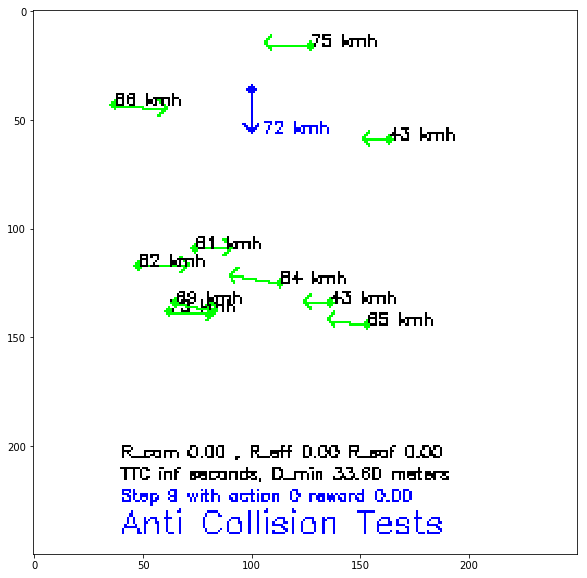

In [7]:
show_img(images[8])

# Visualization

In [8]:
import imageio
from IPython.core.display import HTML

In [9]:
imageio.mimsave('img/visu.gif', images, duration=0.2)
HTML("""<img src="img/visu.gif"/>""")

In [10]:
big_images = resize_images(images, f=2)
imageio.mimsave('img/visu2.gif', big_images, duration=0.2)
HTML("""<img src="img/visu2.gif"/>""")